<img src="../../../images/banners/mpl.jpg" width="500"/>

# <img src="../../../images/logos/mpl.png" width="25"/> An introduction to `matplotlib`

## <img src="../../../images/logos/toc.png" width="20"/> Table of Contents 
* [A Simple Example](#a_simple_example)
* [Parts of a Figure](#parts_of_a_figure)
* [Types of inputs to plotting functions](#types_of_inputs_to_plotting_functions)
* [Coding styles](#coding_styles)
    * [The explicit and the implicit interfaces](#the_explicit_and_the_implicit_interfaces)
    * [Making a helper functions](#making_a_helper_functions)
* [Styling Artists](#styling_artists)
    * [Colors](#colors)
    * [Linewidths, linestyles, and markersizes](#linewidths,_linestyles,_and_markersizes)
* [Labelling plots](#labelling_plots)
    * [Axes labels and text](#axes_labels_and_text)
    * [Using mathematical expressions in text](#using_mathematical_expressions_in_text)
    * [Annotations](#annotations)
    * [Legends](#legends)
* [Axis scales and ticks](#axis_scales_and_ticks)
    * [Scales](#scales)
    * [Tick locators and formatters](#tick_locators_and_formatters)
    * [Plotting dates and strings](#plotting_dates_and_strings)
    * [Additional Axis objects](#additional_axis_objects)
* [Color mapped data](#color_mapped_data)
    * [Colormaps](#colormaps)
    * [Normalizations](#normalizations)
    * [Colorbars](#colorbars)
* [Working with multiple Figures and Axes](#working_with_multiple_figures_and_axes)
* [More reading](#more_reading)

---

This tutorial covers some basic usage patterns and best practices to
help you get started with Matplotlib.

<a class="anchor" id="a_simple_example"></a>
## A Simple Example

Matplotlib graphs your data on [`Figure`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure)s (e.g., windows, Jupyter
widgets, etc.), each of which can contain one or more [`Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes), an
area where points can be specified in terms of x-y coordinates (or theta-r
in a polar plot, x-y-z in a 3D plot, etc). The simplest way of
creating a Figure with an Axes is using [`pyplot.subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots). We can then use
[`Axes.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot) to draw some data on the Axes:

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [4]:
%matplotlib inline

> Matplotlib Inline command is a magic command that makes the plots generated by matplotlib show into the IPython shell that we are running and not in a separate output window. 
The only reason `%matplotlib inline` is used is to render any matplotlib diagrams even if the `plt.show()` function is not called. You will learn more about `plt.show()` later.

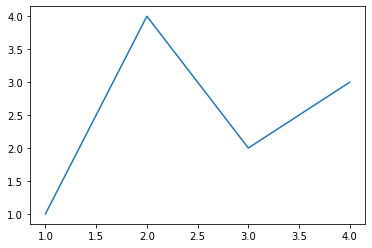

In [5]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.

[`matplotlib.pyplot`](https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot "matplotlib.pyplot") is a collection of functions that make matplotlib
work like MATLAB. Each `pyplot` function makes some change to a figure:
e.g., creates a figure, creates a plotting area in a figure, plots some lines
in a plotting area, decorates the plot with labels, etc.

<a class="anchor" id="parts_of_a_figure"></a>
## Parts of a Figure

Here are the components of a Matplotlib Figure.

<img src="../images/anatomy.webp" width="500px">

<a class="anchor" id="figure"></a>
## [`Figure`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure)

The whole figure. The Figure keeps track of all the child [`Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes), a group of 'special' Artists (titles, figure legends, colorbars, etc), and even nested subfigures.

The easiest way to create a new Figure is with pyplot:

<Figure size 432x288 with 0 Axes>

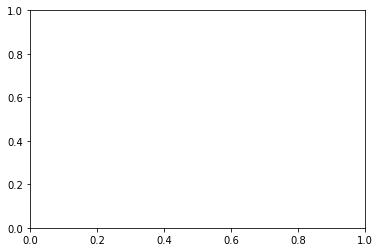

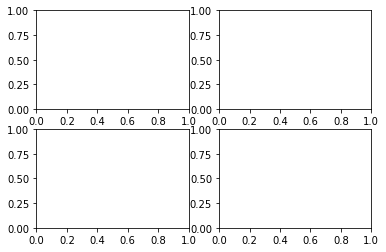

In [6]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

It is often convenient to create the Axes together with the Figure, but you can also manually add Axes later on.

<a class="anchor" id="axes"></a>
## [`Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes)

An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) [`Axis`](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis) objects (be aware of the difference between **Axes** and **Axis**) that provide ticks and tick labels to provide scales for the data in the Axes. Each [`Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) also has a title (set via [`set_title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html#matplotlib.axes.Axes.set_title), an x-label (set via [`set_xlabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html#matplotlib.axes.Axes.set_xlabel)), and a y-label set via [`set_ylabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html#matplotlib.axes.Axes.set_ylabel)).

> **Note:** Artist is the object that knows how to use a renderer to paint onto the canvas. For more information read [Artist Tutorial](https://matplotlib.org/stable/tutorials/intermediate/artists.html)

The [`Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) class and its member functions are the primary entry point to working with the OOP interface, and have most of the plotting methods defined on them (e.g. `ax.plot()`, shown above, uses the [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot) method)

> **Note:** The Figure is like a canvas, and the Axes is a part of that canvas on which we will make a particular visualization.

<a class="anchor" id="axis"></a>
## [`Axis`](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis)

These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a [`Locator`](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Locator) object and the ticklabel strings are formatted by a [`Formatter`](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Formatter). The combination of the correct [`Locator`](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Locator) and [`Formatter`](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Formatter) gives very fine control over the tick locations and labels.

<a class="anchor" id="artist"></a>
## [`Artist`](https://matplotlib.org/stable/api/artist_api.html#matplotlib.artist.Artist)

There are three layers to the Matplotlib API.

- the `matplotlib.backend_bases.FigureCanvas` is the area onto which the figure is drawn
- the `matplotlib.backend_bases.Renderer` is the object which knows how to draw on the `FigureCanvas`
- and the `matplotlib.artist.Artist` is the object that knows how to use a renderer to paint onto the canvas.

The `FigureCanvas` and `Renderer` handle all the details of talking to user interface toolkits like wxPython or drawing languages like PostScript®, and the `Artist` handles all the high level constructs like representing and laying out the figure, text, and lines. The typical user will spend 95% of their time working with the `Artists`.

There are two types of `Artists`: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: `Line2D`, `Rectangle`, `Text`, `AxesImage`, etc., and the containers are places to put them (`Axis`, `Axes` and `Figure`). The standard use is to create a `Figure` instance, use the `Figure` to create one or more `Axes` or `Subplot` instances, and use the `Axes` instance helper methods to create the primitives

So basically, everything visible on the Figure is an Artist (even [`Figure`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure), [`Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes), and [`Axis`](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis) objects). This includes [`Text`](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text) objects, [`Line2D`](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) objects, [`collections`](https://matplotlib.org/stable/api/collections_api.html#module-matplotlib.collections) objects, [`Patch`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html#matplotlib.patches.Patch) objects, etc. When the Figure is rendered, all of the Artists are drawn to the **canvas**. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

<a class="anchor" id="types_of_inputs_to_plotting_functions"></a>
## Types of inputs to plotting functions

Plotting functions expect [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array "(in NumPy v1.23)") or [`numpy.ma.masked_array`](https://numpy.org/doc/stable/reference/generated/numpy.ma.masked_array.html#numpy.ma.masked_array "(in NumPy v1.23)") as
input, or objects that can be passed to [`numpy.asarray`](https://numpy.org/doc/stable/reference/generated/numpy.asarray.html#numpy.asarray "(in NumPy v1.23)").
Classes that are similar to arrays ('array-like') such as [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html#module-pandas "(in pandas v1.5.1)")
data objects and [`numpy.matrix`](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html#numpy.matrix "(in NumPy v1.23)") may not work as intended. Common convention
is to convert these to [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array "(in NumPy v1.23)") objects prior to plotting.
For example, to convert a [`numpy.matrix`](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html#numpy.matrix "(in NumPy v1.23)")

In [7]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

Most methods will also parse an addressable object like a *dict*, a
[`numpy.recarray`](https://numpy.org/doc/stable/reference/generated/numpy.recarray.html#numpy.recarray "(in NumPy v1.23)"), or a [`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame "(in pandas v1.5.1)"). Matplotlib allows you provide
the `data` keyword argument and generate plots passing the strings
corresponding to the *x* and *y* variables.

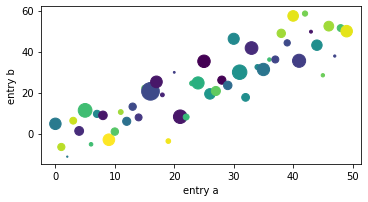

In [76]:
# Seed the random number generator.
np.random.seed(19680801)

# Generate data
data = {
    'a': np.arange(50),
    'c': np.random.randint(0, 50, 50),
    'd': np.random.randn(50)
}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

# Plot
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b');

> **Note:** While indexing in NumPy follows the form (row, column), the figsize keyword argument follows the form (width, height). This follows conventions in visualization, which unfortunately are different from those of linear algebra.

<a class="anchor" id="coding_styles"></a>
## Coding styles

<a class="anchor" id="the_explicit_and_the_implicit_interfaces"></a>
### The explicit and the implicit interfaces

As noted above, there are essentially two ways to use Matplotlib:
- Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").
- Rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting.

See [Matplotlib Application Interfaces (APIs)](https://matplotlib.org/stable/users/explain/api_interfaces.html#api-interfaces) for an explanation of the tradeoffs between the
implicit and explicit interfaces.

So one can use the OO-style

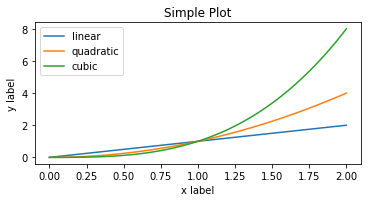

In [16]:
# OO-Style
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

or the pyplot-style:

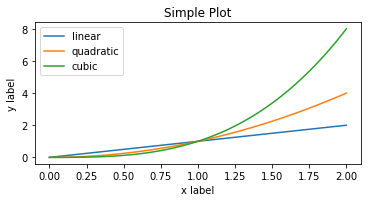

In [17]:
# pyplot-Style
x = np.linspace(0, 2, 100)

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

(In addition, there is a third approach, for the case when embedding
Matplotlib in a GUI application, which completely drops pyplot, even for
figure creation. See the corresponding section in the gallery for more info:
[Embedding Matplotlib in graphical user interfaces](https://matplotlib.org/stable/gallery/user_interfaces/index.html#user-interfaces).)

Matplotlib's documentation and examples use both the OO and the pyplot
styles. In general, we suggest using the OO style, particularly for
complicated plots, and functions and scripts that are intended to be reused
as part of a larger project. However, the pyplot style can be very convenient
for quick interactive work.

<a class="anchor" id="making_a_helper_functions"></a>
### Making a helper functions

If you need to make the same plots over and over again with different data
sets, or want to easily wrap Matplotlib methods, use the recommended
signature function below.

In [18]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

which you would then use twice to populate two subplots:

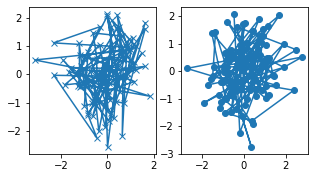

In [19]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

> **Note:** We later use third-party packages such as `seaborn` that are powered by matplotlib and wrap it, so we don't have to write our own helpers and wrappers most of the times. 

<a class="anchor" id="styling_artists"></a>
## Styling Artists

Most plotting methods have styling options for the Artists, accessible either
when a plotting method is called, or from a "setter" on the Artist. In the
plot below we manually set the *color*, *linewidth*, and *linestyle* of the
Artists created by [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot), and we set the linestyle of the second line
after the fact with [`set_linestyle`](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle).

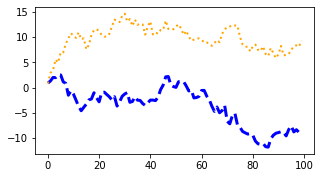

In [20]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':');

<a class="anchor" id="colors"></a>
### Colors

Matplotlib has a very flexible array of colors that are accepted for most
Artists; see the [colors tutorial](https://matplotlib.org/stable/tutorials/colors/colors.html) for a
list of specifications. Some Artists will take multiple colors. i.e. for
a [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter) plot, the edge of the markers can be different colors
from the interior:

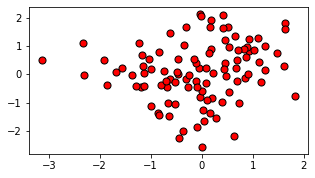

In [29]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='r', edgecolor='k');

<a class="anchor" id="linewidths,_linestyles,_and_markersizes"></a>
### Linewidths, linestyles, and markersizes

Line widths are typically in typographic points (1 pt = 1/72 inch) and
available for Artists that have stroked lines. Similarly, stroked lines
can have a linestyle. See the [linestyles example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html).

Marker size depends on the method being used. [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot "matplotlib.axes.Axes.plot") specifies
markersize in points, and is generally the "diameter" or width of the
marker. [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter "matplotlib.axes.Axes.scatter") specifies markersize as approximately
proportional to the visual area of the marker. There is an array of
markerstyles available as string codes (see [`markers`](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers "matplotlib.markers")), or
users can define their own [`MarkerStyle`](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle "matplotlib.markers.MarkerStyle") (see
[Marker reference](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html)):

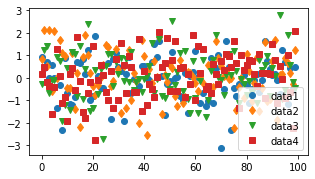

In [32]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend();

<a class="anchor" id="labelling_plots"></a>
## Labelling plots

<a class="anchor" id="axes_labels_and_text"></a>
### Axes labels and text

[`set_xlabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html#matplotlib.axes.Axes.set_xlabel "matplotlib.axes.Axes.set_xlabel"), [`set_ylabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html#matplotlib.axes.Axes.set_ylabel "matplotlib.axes.Axes.set_ylabel"), and [`set_title`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html#matplotlib.axes.Axes.set_title "matplotlib.axes.Axes.set_title") are used to
add text in the indicated locations (see [Text in Matplotlib Plots](../text/text_intro.html)
for more discussion). Text can also be directly added to plots using
[`text`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html#matplotlib.axes.Axes.text "matplotlib.axes.Axes.text"):

In [ ]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True);

NameError: name 'np' is not defined

In [36]:
t = ax.set_xlabel('my data', fontsize=14, color='red')

All of the [`text`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html#matplotlib.axes.Axes.text "matplotlib.axes.Axes.text") functions return a [`matplotlib.text.Text`](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text "matplotlib.text.Text")
instance. Just as with lines above, you can customize the properties by
passing keyword arguments into the text functions:

These properties are covered in more detail in
[Text properties and layout](../text/text_props.html).

<a class="anchor" id="using_mathematical_expressions_in_text"></a>
### Using mathematical expressions in text

Matplotlib accepts TeX equation expressions in any text expression.
For example to write the expression ($\sigma_i=15$) in the title,
you can write a TeX expression surrounded by dollar signs:

where the `r` preceding the title string signifies that the string is a
*raw* string and not to treat backslashes as python escapes.
Matplotlib has a built-in TeX expression parser and
layout engine, and ships its own math fonts – for details see
[Writing mathematical expressions](../text/mathtext.html). You can also use LaTeX directly to format
your text and incorporate the output directly into your display figures or
saved postscript – see [Text rendering with LaTeX](../text/usetex.html).

<a class="anchor" id="annotations"></a>
### Annotations

We can also annotate points on a plot, often by connecting an arrow pointing
to *xy*, to a piece of text at *xytext*:

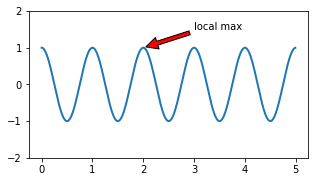

In [62]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate(
    'local max', xy=(2, 1), xytext=(3, 1.5),
    arrowprops=dict(facecolor='r', edgecolor='k', shrink=0.05)
)

ax.set_ylim(-2, 2);

In this basic example, both *xy* and *xytext* are in data coordinates.
There are a variety of other coordinate systems one can choose -- see
[Basic annotation](../text/annotations.html#annotations-tutorial) and [Advanced Annotations](../text/annotations.html#plotting-guide-annotation) for
details. More examples also can be found in
[Annotating Plots](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html).

<a class="anchor" id="legends"></a>
### Legends

Often we want to identify lines or markers with a [`Axes.legend`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html#matplotlib.axes.Axes.legend "matplotlib.axes.Axes.legend"):

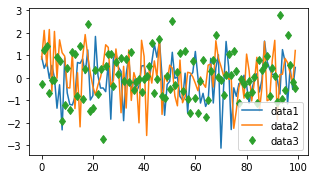

In [63]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend();

Legends in Matplotlib are quite flexible in layout, placement, and what
Artists they can represent. They are discussed in detail in
[Legend guide](../intermediate/legend_guide.html).

<a class="anchor" id="axis_scales_and_ticks"></a>
## Axis scales and ticks

Each Axes has two (or three) [`Axis`](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis "matplotlib.axis.Axis") objects representing the x- and
y-axis. These control the *scale* of the Axis, the tick *locators* and the
tick *formatters*. Additional Axes can be attached to display further Axis
objects.

<a class="anchor" id="scales"></a>
### Scales

In addition to the linear scale, Matplotlib supplies non-linear scales,
such as a log-scale. Since log-scales are used so much there are also
direct methods like [`loglog`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.loglog.html#matplotlib.axes.Axes.loglog "matplotlib.axes.Axes.loglog"), [`semilogx`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.semilogx.html#matplotlib.axes.Axes.semilogx "matplotlib.axes.Axes.semilogx"), and
[`semilogy`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.semilogy.html#matplotlib.axes.Axes.semilogy "matplotlib.axes.Axes.semilogy"). There are a number of scales (see
[Scales](https://matplotlib.org/stable/gallery/scales/scales.html) for other examples). Here we set the scale
manually:

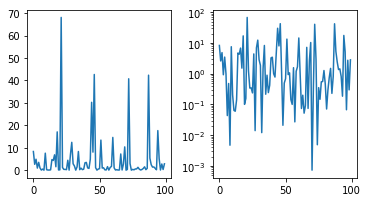

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10 ** data1

# First figure
axs[0].plot(xdata, data)

# Second figure
axs[1].set_yscale('log')
axs[1].plot(xdata, data);

The scale sets the mapping from data values to spacing along the Axis. This
happens in both directions, and gets combined into a *transform*, which
is the way that Matplotlib maps from data coordinates to Axes, Figure, or
screen coordinates. See [Transformations Tutorial](../advanced/transforms_tutorial.html).

<a class="anchor" id="tick_locators_and_formatters"></a>
### Tick locators and formatters

Each Axis has a tick *locator* and *formatter* that choose where along the
Axis objects to put tick marks. A simple interface to this is
[`set_xticks`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html#matplotlib.axes.Axes.set_xticks "matplotlib.axes.Axes.set_xticks"):

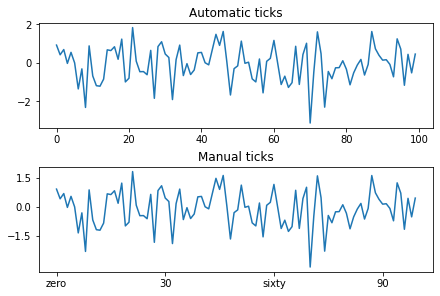

In [68]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks');

Different scales can have different locators and formatters; for instance
the log-scale above uses [`LogLocator`](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.LogLocator "matplotlib.ticker.LogLocator") and [`LogFormatter`](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.LogFormatter "matplotlib.ticker.LogFormatter"). See
[Tick locators](https://matplotlib.org/stable/gallery/ticks/tick-locators.html) and
[Tick formatters](https://matplotlib.org/stable/gallery/ticks/tick-formatters.html) for other formatters and
locators and information for writing your own.

<a class="anchor" id="additional_axis_objects"></a>
### Additional Axis objects

Plotting data of different magnitude in one chart may require
an additional y-axis. Such an Axis can be created by using
[`twinx`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html#matplotlib.axes.Axes.twinx "matplotlib.axes.Axes.twinx") to add a new Axes with an invisible x-axis and a y-axis
positioned at the right (analogously for [`twiny`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twiny.html#matplotlib.axes.Axes.twiny "matplotlib.axes.Axes.twiny")). See
[Plots with different scales](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html) for another example.

Similarly, you can add a [`secondary_xaxis`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.secondary_xaxis.html#matplotlib.axes.Axes.secondary_xaxis "matplotlib.axes.Axes.secondary_xaxis") or
[`secondary_yaxis`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.secondary_yaxis.html#matplotlib.axes.Axes.secondary_yaxis "matplotlib.axes.Axes.secondary_yaxis") having a different scale than the main Axis to
represent the data in different scales or units. See
[Secondary Axis](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html) for further
examples.

Text(0.5, 0, 'Angle [°]')

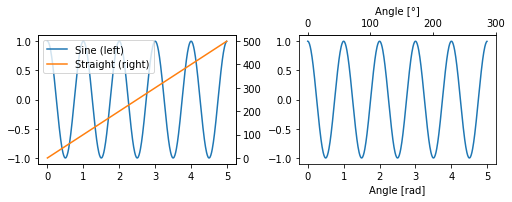

In [70]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')

<a class="anchor" id="color_mapped_data"></a>
## Color mapped data

Often we want to have a third dimension in a plot represented by a colors in
a colormap. Matplotlib has a number of plot types that do this:

Text(0.5, 1.0, 'scatter()')

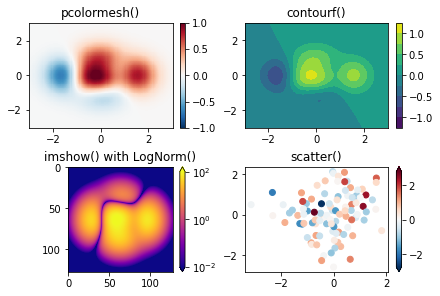

In [71]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

<a class="anchor" id="colormaps"></a>
### Colormaps

These are all examples of Artists that derive from [`ScalarMappable`](https://matplotlib.org/stable/api/cm_api.html#matplotlib.cm.ScalarMappable "matplotlib.cm.ScalarMappable")
objects. They all can set a linear mapping between *vmin* and *vmax* into
the colormap specified by *cmap*. Matplotlib has many colormaps to choose
from ([Choosing Colormaps in Matplotlib](../colors/colormaps.html)) you can make your
own ([Creating Colormaps in Matplotlib](../colors/colormap-manipulation.html)) or download as
[third-party packages](https://matplotlib.org/mpl-third-party/#colormaps-and-styles).

<a class="anchor" id="normalizations"></a>
### Normalizations

Sometimes we want a non-linear mapping of the data to the colormap, as
in the `LogNorm` example above. We do this by supplying the
ScalarMappable with the *norm* argument instead of *vmin* and *vmax*.
More normalizations are shown at [Colormap Normalization](../colors/colormapnorms.html).

<a class="anchor" id="colorbars"></a>
### Colorbars

Adding a [`colorbar`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.colorbar "matplotlib.figure.Figure.colorbar") gives a key to relate the color back to the
underlying data. Colorbars are figure-level Artists, and are attached to
a ScalarMappable (where they get their information about the norm and
colormap) and usually steal space from a parent Axes. Placement of
colorbars can be complex: see
[Placing Colorbars](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/colorbar_placement.html) for
details. You can also change the appearance of colorbars with the
*extend* keyword to add arrows to the ends, and *shrink* and *aspect* to
control the size. Finally, the colorbar will have default locators
and formatters appropriate to the norm. These can be changed as for
other Axis objects.

<a class="anchor" id="working_with_multiple_figures_and_axes"></a>
## Working with multiple Figures and Axes

You can open multiple Figures with multiple calls to
`fig = plt.figure()` or `fig2, ax = plt.subplots()`. By keeping the
object references you can add Artists to either Figure.

Multiple Axes can be added a number of ways, but the most basic is
`plt.subplots()` as used above. One can achieve more complex layouts,
with Axes objects spanning columns or rows, using [`subplot_mosaic`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot_mosaic.html#matplotlib.pyplot.subplot_mosaic "matplotlib.pyplot.subplot_mosaic").

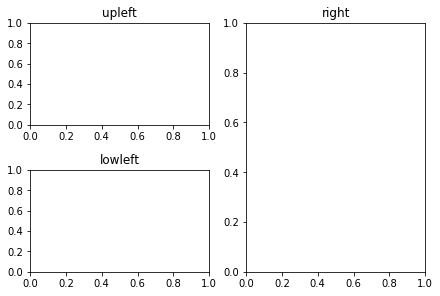

In [75]:
fig, axd = plt.subplot_mosaic(
    [['upleft', 'right'],
    ['lowleft', 'right']],
    layout='constrained'
)
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right');

Matplotlib has quite sophisticated tools for arranging Axes: See
[Arranging multiple Axes in a Figure](../intermediate/arranging_axes.html) and
[Complex and semantic figure composition](../provisional/mosaic.html).

<a class="anchor" id="saving_our_plot"></a>
## Saving Our Plot

Finally, if we're happy with the outcome of our plot, we want to save it to disk. There are many file formats we can save to in Matplotlib. To see a list of available options, use:

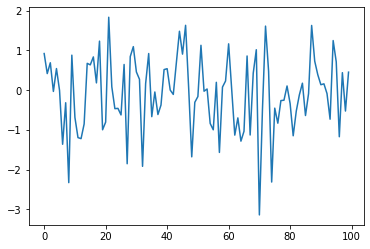

In [80]:
fig, ax = plt.subplots()
ax.plot(data1)

In [81]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

We can then use the `figure.Figure.savefig()` in order to save the figure to disk. Note that there are several useful flags we show below:

- `transparent=True` makes the background of the saved figure transparent if the format supports it.
- `dpi=80` controls the resolution (dots per square inch) of the output.
- `bbox_inches="tight"` fits the bounds of the figure to our plot.

In [82]:
fig.savefig(
    'final.png',
    transparent=False,
    dpi=80,
    bbox_inches="tight"
)

<a class="anchor" id="more_reading"></a>
## More reading

For more plot types see [Plot types](https://matplotlib.org/stable/plot_types/index.html) and the
[API reference](https://matplotlib.org/stable/api/index.html), in particular the
[Axes API](https://matplotlib.org/stable/api/axes_api.html).